In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('loan-train.csv')
df2 = pd.read_csv('loan-test.csv')

In [ ]:
df = pd.concat([df1, df2], axis=0)

In [ ]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
47,LP001242,Male,No,0,Not Graduate,No,2356,1902.0,108.0,360.0,1.0,Semiurban,NaN
484,LP002543,Male,Yes,2,Graduate,No,8333,0.0,246.0,360.0,1.0,Semiurban,Y
172,LP001975,Male,Yes,0,Graduate,No,5225,0.0,143.0,360.0,1.0,Rural,NaN
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422.0,152.0,360.0,1.0,Urban,NaN
41,LP001120,Male,No,0,Graduate,No,1800,1213.0,47.0,360.0,1.0,Urban,Y
86,LP001455,Male,Yes,0,Graduate,No,3571,1917.0,135.0,360.0,1.0,Urban,NaN
82,LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
306,LP002721,Male,Yes,2,Graduate,Yes,7500,0.0,183.0,360.0,1.0,Rural,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [ ]:
df['Married'].unique(),df['Gender'].unique(),df['Dependents'].unique(),df['Education'].unique(),df['Self_Employed'].unique()

(array(['No', 'Yes', nan], dtype=object),
 array(['Male', 'Female', nan], dtype=object),
 array(['0', '1', '2', '3+', nan], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes', nan], dtype=object))

In [ ]:
df[cols].sample(5)

NameError: name 'cols' is not defined

In [ ]:
len(df[cols].dropna()) / len(df)

NameError: name 'cols' is not defined

In [ ]:
new_df = df[cols].dropna(axis=0)
df.shape, new_df.shape

NameError: name 'cols' is not defined

In [ ]:
df_cleaned = df.dropna(subset=['Gender', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term'])

In [ ]:
df_cleaned.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed         53
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        74
Property_Area          0
Loan_Status          337
dtype: int64

In [ ]:
df_cleaned['Credit_History'] = df_cleaned['Credit_History'].fillna(99)
df_cleaned['Self_Employed'] = df_cleaned['Self_Employed'].fillna('Missing')

<ipython-input-11-aa7434311197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Credit_History'] = df_cleaned['Credit_History'].fillna(99)
<ipython-input-11-aa7434311197>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Self_Employed'] = df_cleaned['Self_Employed'].fillna('Missing')


In [ ]:
df_cleaned.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
595,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
345,LP002878,Male,Yes,3+,Graduate,No,8334,0.0,260.0,360.0,1.0,Urban,NaN


In [ ]:
df_cleaned = df_cleaned.drop(columns=['Loan_ID'])

In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['Gender', 'Married', 'Dependents', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
num_feat = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
cat_feat = df_cleaned.select_dtypes(include=['object']).columns

In [ ]:
cat_feat

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

# Visualising

<ipython-input-14-dd358a5a6987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

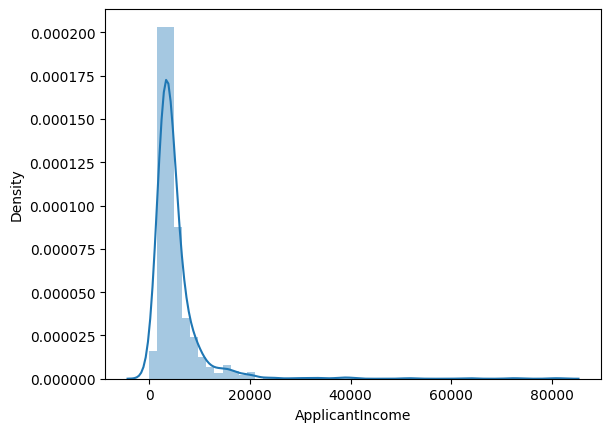

In [ ]:
sns.distplot(df['ApplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

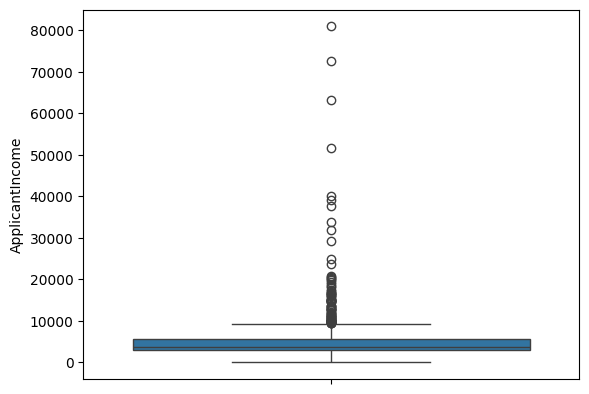

In [ ]:
sns.boxplot(df['ApplicantIncome'])

In [ ]:
# Using IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)].value_counts().shape

(430,)

In [ ]:
from ydata_profiling import ProfileReport
prof = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
prof.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Harsh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_train = df_cleaned[df_cleaned.notnull().all(axis=1)]
df_test = df_cleaned[df_cleaned.isnull().any(axis=1)]

In [ ]:
df_train.shape,df_test.shape

((553, 12), (337, 12))

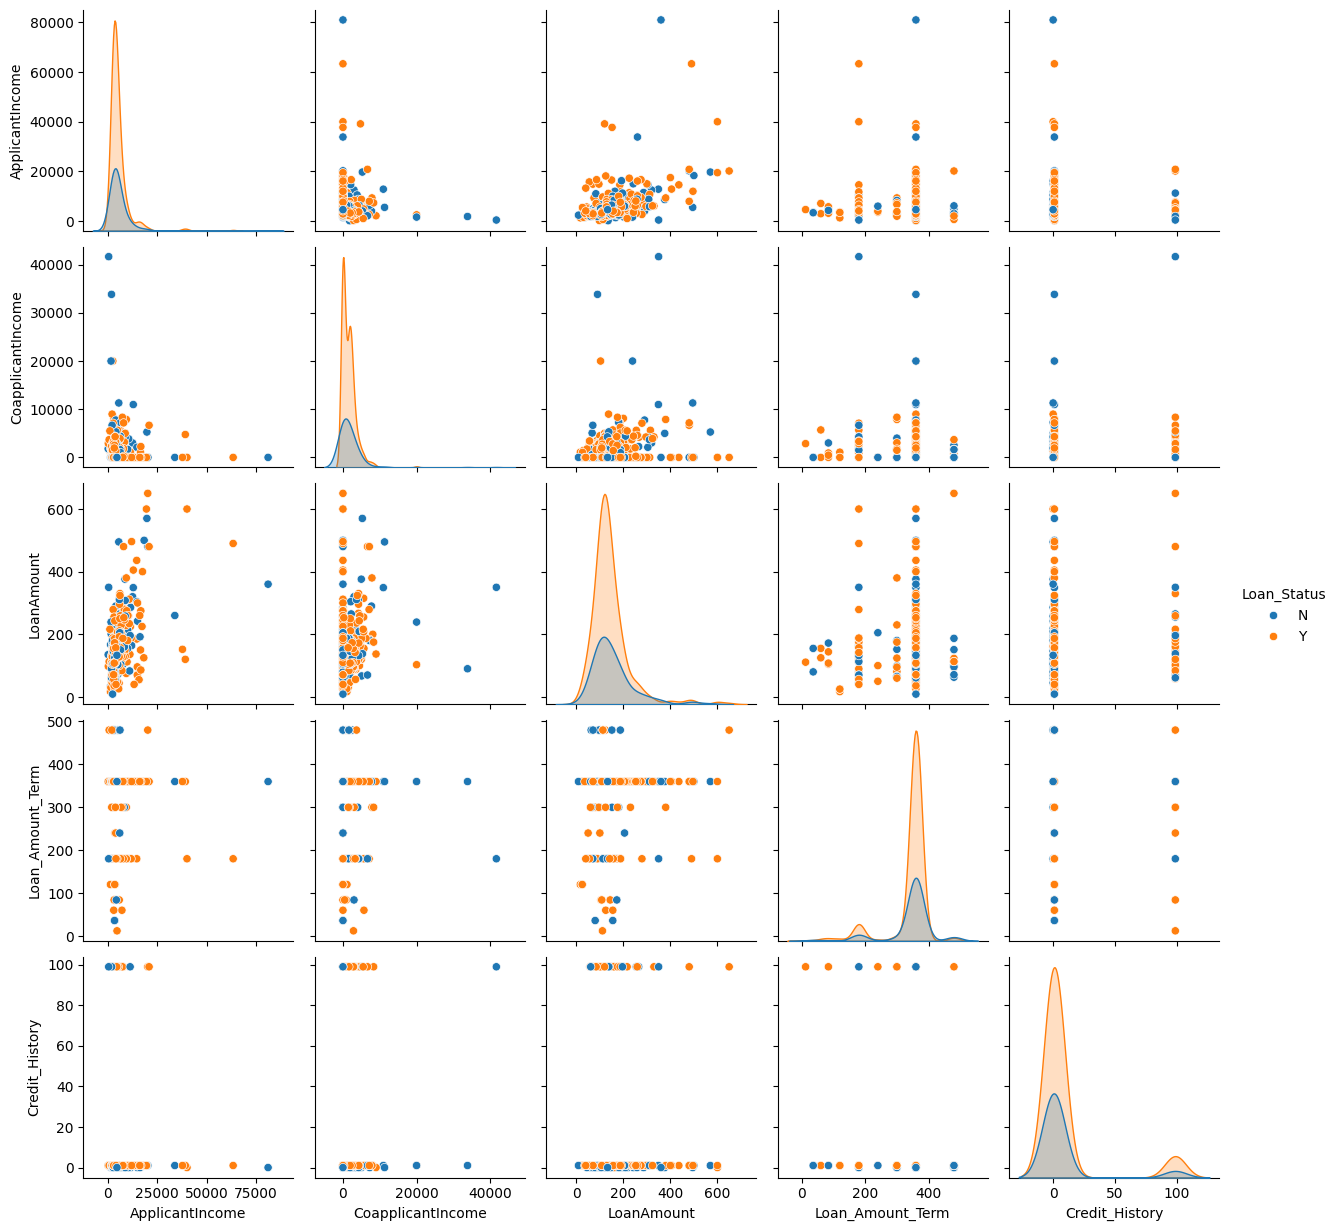

In [ ]:
sns.pairplot(df_train,hue='Loan_Status')

In [ ]:
columns_to_encode = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    object 
 1   Married            553 non-null    object 
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    object 
 4   Self_Employed      553 non-null    object 
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    object 
 11  Loan_Status        553 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 56.2+ KB


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,drop='first')
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_train.iloc[:,:-1], df_train.iloc[:,-1],test_size=0.2,random_state=42)


In [ ]:
transformer = ColumnTransformer(transformers=[
    ('trf1',OneHotEncoder(sparse_output=False,drop='first'),['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
],remainder='passthrough')

In [ ]:
datax = transformer.fit_transform(X_train)

In [ ]:
X_train = pd.DataFrame(datax)

In [ ]:
datatest = transformer.transform(X_test)

In [ ]:
X_test = pd.DataFrame(datatest)

# Logistic Reg

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Users\Harsh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.76      0.38      0.51        34
           Y       0.78      0.95      0.85        77

    accuracy                           0.77       111
   macro avg       0.77      0.67      0.68       111
weighted avg       0.77      0.77      0.75       111



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.25      0.09      0.13        34
           Y       0.69      0.88      0.77        77

    accuracy                           0.64       111
   macro avg       0.47      0.49      0.45       111
weighted avg       0.55      0.64      0.58       111



In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

Perceptron()

In [ ]:
clf.score(X_train, y_train)

0.7058823529411765

In [ ]:
y_pred = model.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           N       0.00      0.00      0.00        34
           Y       0.69      1.00      0.82        77

    accuracy                           0.69       111
   macro avg       0.35      0.50      0.41       111
weighted avg       0.48      0.69      0.57       111



C:\Users\Harsh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh Verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Neural Network

20     N
365    N
539    Y
330    Y
531    Y
      ..
80     Y
123    Y
300    N
485    Y
118    N
Name: Loan_Status, Length: 442, dtype: object